# **Live Code 1**
### **HACTIV8 Full Time Data Science Phase 1**

# **1. Perkenalan** 

## **1.1 Identitas**

> Nama  : Ropiudin

> Batch : FTDS OO2-HCK

> Live Code : Live Code 1 

# **2. Judul/Penanda Soal** 

> 1. Buatlah model Linear Regression untuk memprediksi biaya asuransi menggunakan dataset yang dapat diunduh [disini](https://www.kaggle.com/mirichoi0218/insurance?select=insurance.csv)

> 2. Buatlah model Logistic Regression untuk mengklasifikasikan tipe galaksi menggunakan dataset yang dapat diunduh [disini](https://raw.githubusercontent.com/fahmimnalfrzki/Dataset/main/GalaxyMorphology.csv)

# **3. Import Pustaka** 

In [198]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [199]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression,LogisticRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings(action='ignore')

# **1. Linear Regression**

## **1. Data Loading** 

In [200]:
df_lin = pd.read_csv('insurance.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option("display.precision", 0)
df_lin

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924
1,18,male,33.770,1,no,southeast,1725.552
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.471
4,32,male,28.880,0,no,northwest,3866.855
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.548
1334,18,female,31.920,0,no,northeast,2205.981
1335,18,female,36.850,0,no,southeast,1629.833
1336,21,female,25.800,0,no,southwest,2007.945


In [201]:
df_lin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [202]:
# numeric overview
df_lin.describe()

,age,bmi,children,charges
count,1338.000,1338.000,1338.000,1338.000
mean,39.207,30.663,1.095,13270.422
std,14.050,6.098,1.205,12110.011
min,18.000,15.960,0.000,1121.874
25%,27.000,26.296,0.000,4740.287
50%,39.000,30.400,1.000,9382.033
75%,51.000,34.694,2.000,16639.913
max,64.000,53.130,5.000,63770.428


In [203]:
df_lin.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [204]:
df_lin[df_lin.duplicated()].shape

(1, 7)

In [205]:
num_col = df_lin.describe().columns.tolist()
cat_col = df_lin.select_dtypes(include=['object']).columns.tolist()

In [206]:
# numeric overview
df_lin[num_col].describe()

,age,bmi,children,charges
count,1338.000,1338.000,1338.000,1338.000
mean,39.207,30.663,1.095,13270.422
std,14.050,6.098,1.205,12110.011
min,18.000,15.960,0.000,1121.874
25%,27.000,26.296,0.000,4740.287
50%,39.000,30.400,1.000,9382.033
75%,51.000,34.694,2.000,16639.913
max,64.000,53.130,5.000,63770.428


In [207]:
# categorical overview
for i in cat_col:
    print(i)
    print()
    print(df_lin[i].value_counts())
    print('-' * 10)

sex

male      676
female    662
Name: sex, dtype: int64
----------
smoker

no     1064
yes     274
Name: smoker, dtype: int64
----------
region

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
----------


> Berdasarkan hasil analisa di atas diperoleh informasi:

> 1. Pada dataset tidak terdapat missing value dan terdapat satu data yang duplikat
> 2. Terdapat kolom bertipe numerik sebanyak 4 kolom dan kolom bertipe kategorik sebanyak 3 kolom 

## **2. Data Cleaning** 

In [208]:
# dataframe used in this section saved on df_clean variable
df_lin_clean = df_lin.copy()
df_lin_clean.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924
1,18,male,33.770,1,no,southeast,1725.552
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.471
4,32,male,28.880,0,no,northwest,3866.855


In [209]:
# shape of dataframe before remove duplicates
df_lin_clean[df_lin_clean.duplicated()].shape

(1, 7)

In [210]:
df_lin_clean.drop_duplicates(inplace=True)

# shape of dataframe after remove duplicates
df_lin_clean[df_lin_clean.duplicated()].shape

(0, 7)

In [211]:
df_lin_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


> pada analisa di atas dilakukan drop pada data yang duplikat, sehingga sudah tidak terdapat data yang duplikat

## **3. EDA for Analysis Purpose**

In [212]:
df_lin_clean

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924
1,18,male,33.770,1,no,southeast,1725.552
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.471
4,32,male,28.880,0,no,northwest,3866.855
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.548
1334,18,female,31.920,0,no,northeast,2205.981
1335,18,female,36.850,0,no,southeast,1629.833
1336,21,female,25.800,0,no,southwest,2007.945


In [213]:
df_lin_clean.groupby('age')[['charges']].mean().reset_index()

,age,charges
0,18,7086.218
1,19,9868.929
2,20,10159.698
3,21,4730.464
4,22,10012.933
5,23,12419.820
6,24,10648.016
7,25,9838.365
8,26,6133.825
9,27,12184.702


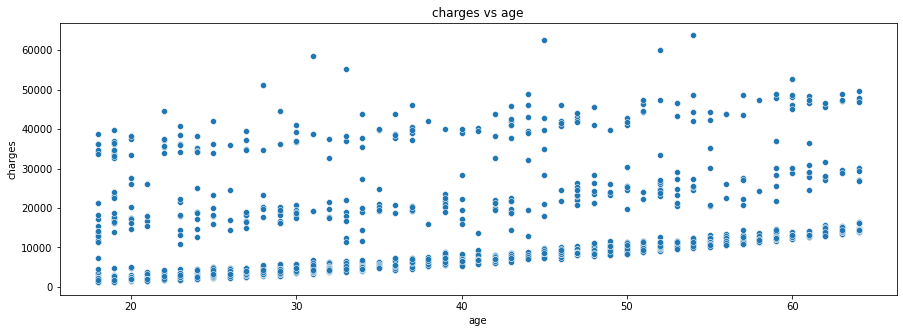

In [214]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x='age', y='charges', data=df_lin_clean)
plt.title('charges vs age')
plt.show()

> grafik di atas penyebaran umur terhadap biaya, yang mana berdasarkan grafik antara umur dan biaya memiliki hubungan yang linear

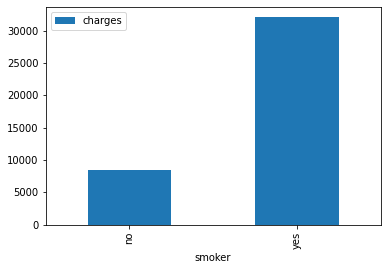

In [215]:
df_lin_clean.groupby('smoker')[['charges']].mean().sort_values('charges').plot(kind='bar')

## **4. Splitting** 

In [216]:
df_lin_inf = df_lin_clean.sample(2,random_state=0)
df_lin_inf

,age,sex,bmi,children,smoker,region,charges
1248,18,female,39.820,0,no,southeast,1633.962
610,47,female,29.370,1,no,southeast,8547.691


In [217]:
df_lin_clean = df_lin_clean.drop(df_lin_inf.index)
df_lin_clean

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924
1,18,male,33.770,1,no,southeast,1725.552
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.471
4,32,male,28.880,0,no,northwest,3866.855
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.548
1334,18,female,31.920,0,no,northeast,2205.981
1335,18,female,36.850,0,no,southeast,1629.833
1336,21,female,25.800,0,no,southwest,2007.945


In [218]:
df_lin_clean.reset_index(drop=True, inplace=True) 
df_lin_inf.reset_index(drop=True, inplace=True)
df_lin_inf

,age,sex,bmi,children,smoker,region,charges
0,18,female,39.820,0,no,southeast,1633.962
1,47,female,29.370,1,no,southeast,8547.691


In [219]:
# define feature and target
X = df_lin_clean.drop('charges', axis=1)
y = df_lin_clean['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [220]:
# for EDA model creation we will use dataframe stored in df_eda
for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(934, 6)
(401, 6)
(934,)
(401,)


In [221]:
df_eda = pd.concat([X_train, y_train], axis=1)

df_eda.shape

(934, 7)

> Analisa diatas merupakan pembagian data, yang mana dataset di bagi menjadi tiga yaitu data feature yang di lambangkan dengan X, data target yang dilambangkan dengan y dan data inference yand di lambangkan dengan df_lin_inf

## **5. Exploratory Data Analysis (EDA) - Modeling**

In [222]:
df_eda.head()

,age,sex,bmi,children,smoker,region,charges
638,33,male,42.400,5,no,southwest,6666.243
724,41,male,28.405,1,no,northwest,6664.686
743,50,female,30.115,1,no,northwest,9910.360
1229,20,female,21.800,0,yes,southwest,20167.336
175,63,female,37.700,0,yes,southwest,48824.450


In [223]:
# get name columns for data type numeric and categoric
num_col = df_eda.select_dtypes(exclude=['object']).columns.tolist()
cat_col = df_eda.select_dtypes(include=['object']).columns.tolist()

> Pada bagian ini akan dilakukan Exploratory Data Analysis (EDA) - Modeling pada data train, yang meliputi handling outlier, heandling missing value, feature selection, encoding dan scaling

### **5.1. Numeric Feature** 

In [224]:
df_eda[num_col].head()

,age,bmi,children,charges
638,33,42.400,5,6666.243
724,41,28.405,1,6664.686
743,50,30.115,1,9910.360
1229,20,21.800,0,20167.336
175,63,37.700,0,48824.450


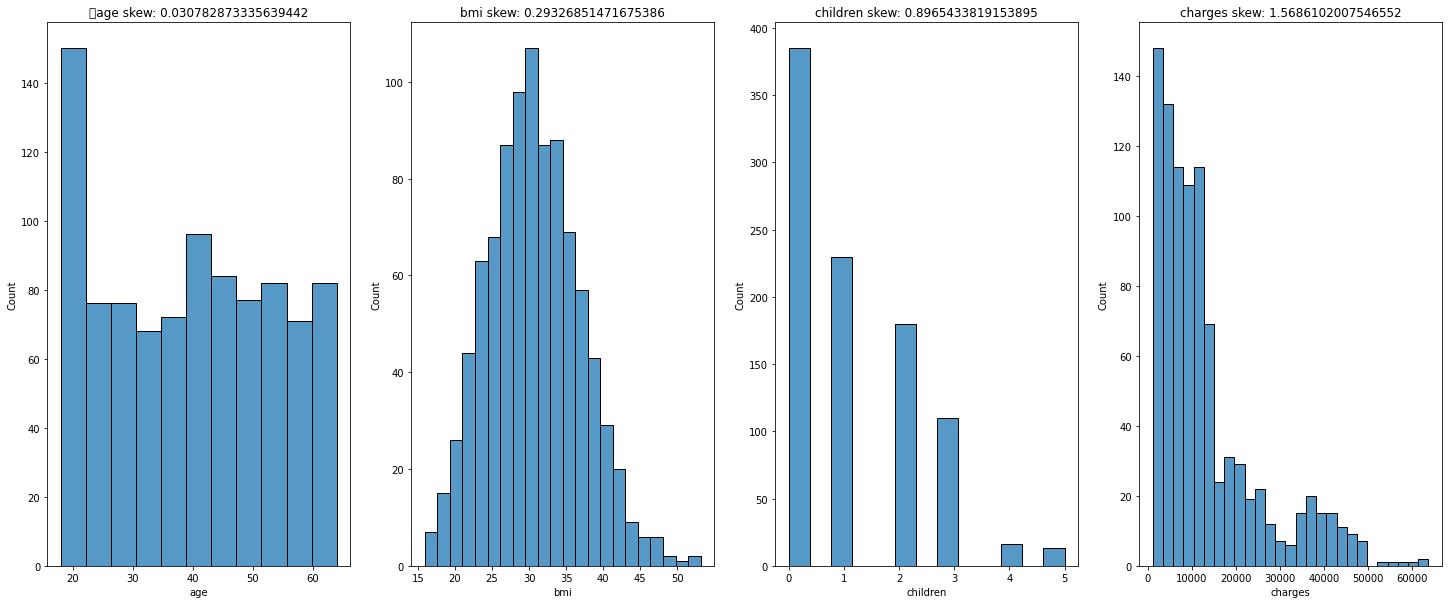

In [225]:
cols_name = ['	age', 'bmi', 'children','charges']

fig, ax = plt.subplots(ncols=4, figsize=[25,10])
ax = ax.flatten()

for idx, col in enumerate(num_col):
    sns.histplot(df_eda[col], ax=ax[idx])
    ax[idx].set_title(f'{cols_name[idx]} skew: {df_eda[col].skew()}')

In [226]:
df_eda['children'].skew()

0.8965433819153895

In [227]:
# outlier detection using IQR 
Q3 = df_eda['children'].quantile(.75)
Q1 = df_eda['children'].quantile(.25)

IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outlier = df_eda[(df_eda['children'] > upper) | (df_eda['children'] < lower)]

print('count of outlier: ', outlier.shape[0])
print('percentage of outlier: ', outlier.shape[0]/df_eda.shape[0] * 100, '%')

count of outlier:  0
percentage of outlier:  0.0 %


In [228]:
# drop outlier if exist, and small proportion
df_eda_cleaned = df_eda[(df_eda['children'] <= upper) & (df_eda['children'] >= lower)]
df_eda_cleaned.shape

(934, 7)

In [229]:
# capping outlier if exist and in large proportion
wins = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['children'])

df_eda_cleaned = wins.fit_transform(df_eda)

In [230]:
# Compare before and after outlier handling
print('before handling: \n', df_eda[num_col].describe())

print('after handling: \n', df_eda_cleaned[num_col].describe())

before handling: 
           age     bmi  children   charges
count 934.000 934.000   934.000   934.000
mean   39.514  30.707     1.123 13247.130
std    14.003   6.199     1.200 11882.703
min    18.000  15.960     0.000  1121.874
25%    27.000  26.400     0.000  4938.468
50%    40.000  30.380     1.000  9623.125
75%    52.000  34.800     2.000 16454.505
max    64.000  53.130     5.000 63770.428
after handling: 
           age     bmi  children   charges
count 934.000 934.000   934.000   934.000
mean   39.514  30.707     1.123 13247.130
std    14.003   6.199     1.200 11882.703
min    18.000  15.960     0.000  1121.874
25%    27.000  26.400     0.000  4938.468
50%    40.000  30.380     1.000  9623.125
75%    52.000  34.800     2.000 16454.505
max    64.000  53.130     5.000 63770.428


> Pada data numerik di data train tidak terdapat outlier, walawpun tidak terdapat outlier tetap dilakukan Winsorizer guna apabila memasukkan data test dapat di heandling outliernya

### **5.2. Categorical Feature** 

In [231]:
# save in df_cat process as temporary variable
df_cat = df_eda[cat_col + ['charges']]

df_cat.head()

,sex,smoker,region,charges
638,male,no,southwest,6666.243
724,male,no,northwest,6664.686
743,female,no,northwest,9910.360
1229,female,yes,southwest,20167.336
175,female,yes,southwest,48824.450


In [232]:
for i in df_cat.columns.tolist():
    print(f'num of unique label in {i}: ', len(df_cat[i].unique()))

num of unique label in sex:  2
num of unique label in smoker:  2
num of unique label in region:  4
num of unique label in charges:  934


**One Hot Encoding for `region`**

In [233]:
ohe_enc = OneHotEncoder(sparse=False, handle_unknown='ignore')

cat_ohe = pd.DataFrame(ohe_enc.fit_transform(df_cat[['region']]))
cat_ohe.columns = ohe_enc.get_feature_names(['region'])

review = pd.concat([df_cat[['region']].reset_index(drop=True), cat_ohe], axis=1)
review

,region,region_northeast,region_northwest,region_southeast,region_southwest
0,southwest,0.000,0.000,0.000,1.000
1,northwest,0.000,1.000,0.000,0.000
2,northwest,0.000,1.000,0.000,0.000
3,southwest,0.000,0.000,0.000,1.000
4,southwest,0.000,0.000,0.000,1.000
...,...,...,...,...,...
929,northwest,0.000,1.000,0.000,0.000
930,northeast,1.000,0.000,0.000,0.000
931,southwest,0.000,0.000,0.000,1.000
932,northwest,0.000,1.000,0.000,0.000


**Ordinal Encoder for `sex` and `smoker`**

In [234]:
for i in ['sex', 'smoker']:
    print(df_cat[i].value_counts())
    print('-'*30)

female    480
male      454
Name: sex, dtype: int64
------------------------------
no     748
yes    186
Name: smoker, dtype: int64
------------------------------


In [235]:
sex_cat = ['male', 'female']
smok_cat = ['no', 'yes']

ord_enc = OrdinalEncoder(categories=[sex_cat, smok_cat])
cat_ord = pd.DataFrame(ord_enc.fit_transform(df_cat[['sex', 'smoker']]))

cat_ord.columns = ['sex1', 'smoker1']
review = pd.concat([df_cat[['sex', 'smoker']].reset_index(drop=True), cat_ord], axis=1)

review

,sex,smoker,sex1,smoker1
0,male,no,0.000,0.000
1,male,no,0.000,0.000
2,female,no,1.000,0.000
3,female,yes,1.000,1.000
4,female,yes,1.000,1.000
...,...,...,...,...
929,female,no,1.000,0.000
930,female,no,1.000,0.000
931,female,yes,1.000,1.000
932,male,no,0.000,0.000


**combine Numerical and Categorical data after processed**

In [236]:
df_eda_cleaned = pd.concat([df_eda.reset_index(drop=True), cat_ohe, cat_ord], axis=1)
df_eda_cleaned.head()

,age,sex,bmi,children,smoker,region,charges,region_northeast,region_northwest,region_southeast,region_southwest,sex1,smoker1
0,33,male,42.400,5,no,southwest,6666.243,0.000,0.000,0.000,1.000,0.000,0.000
1,41,male,28.405,1,no,northwest,6664.686,0.000,1.000,0.000,0.000,0.000,0.000
2,50,female,30.115,1,no,northwest,9910.360,0.000,1.000,0.000,0.000,1.000,0.000
3,20,female,21.800,0,yes,southwest,20167.336,0.000,0.000,0.000,1.000,1.000,1.000
4,63,female,37.700,0,yes,southwest,48824.450,0.000,0.000,0.000,1.000,1.000,1.000


In [237]:
df_eda_cleaned.drop(
    columns = ['sex','smoker','region'],
               axis=1, inplace=True
              )
df_eda_cleaned.head()

,age,bmi,children,charges,region_northeast,region_northwest,region_southeast,region_southwest,sex1,smoker1
0,33,42.400,5,6666.243,0.000,0.000,0.000,1.000,0.000,0.000
1,41,28.405,1,6664.686,0.000,1.000,0.000,0.000,0.000,0.000
2,50,30.115,1,9910.360,0.000,1.000,0.000,0.000,1.000,0.000
3,20,21.800,0,20167.336,0.000,0.000,0.000,1.000,1.000,1.000
4,63,37.700,0,48824.450,0.000,0.000,0.000,1.000,1.000,1.000


> Berdasarkan hasil analisa di atas, merupakan proses endocing. Dimana pada kolom region dilakukan encoding dengan metode One Hot Encoding, dikarnakan pada data region merupakan data yang tidak bisa diurutkan

> Sementara pada kolom sex dan smoker dilakukan encoding dengan metode ordinal encoder dikarnakan pada data sex dan smoker data bisa diurutkan

**Feature Selection Using Heatmap Correlation**

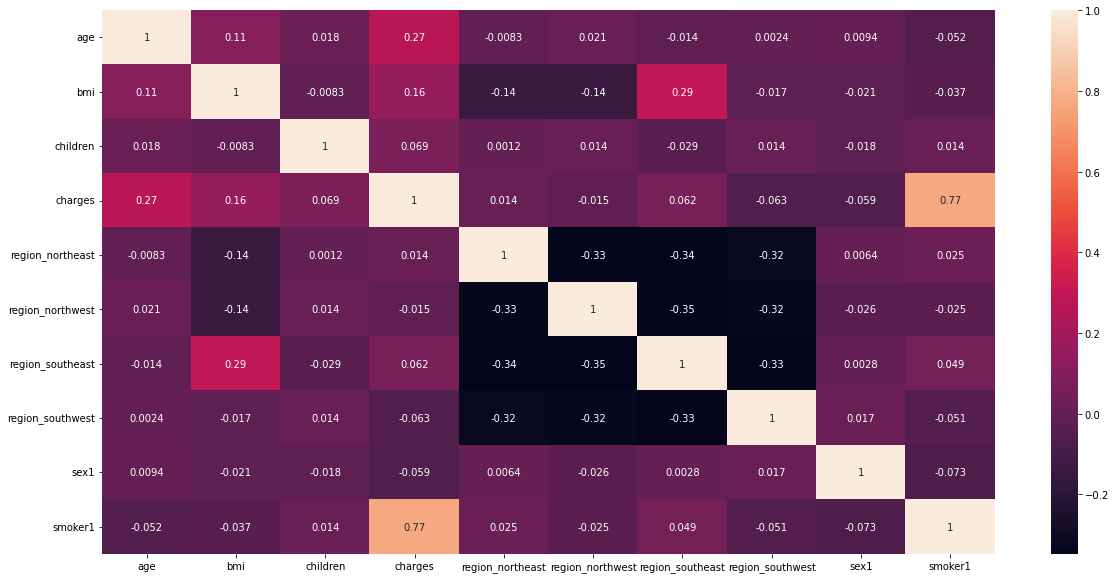

In [238]:
fig,ax = plt.subplots(figsize=[20,10])

corr = df_eda_cleaned.corr()

ax = sns.heatmap(corr,annot=True)
plt.show()

> Berdasarkan hasil heatmap di atas terdapat nilai corr 0.1 adalah pada kolom age, bmi, dan smoker. dikarnakan saya menentukan untuk mengambil kolom yang memiliki nilai corr diatas 0.1, maka kolom yang saya gunakan untuk melakukan pemodelan hanya kolom age, bmi, dan smoker saja

In [239]:
df_eda_cleaned[['age','bmi','smoker1','charges']]

,age,bmi,smoker1,charges
0,33,42.400,0.000,6666.243
1,41,28.405,0.000,6664.686
2,50,30.115,0.000,9910.360
3,20,21.800,1.000,20167.336
4,63,37.700,1.000,48824.450
...,...,...,...,...
929,57,31.825,0.000,11842.624
930,56,28.310,0.000,11657.719
931,46,34.600,1.000,41661.602
932,19,35.530,0.000,1646.430


In [240]:
# numerical scaling

num_col = ['age', 'bmi']
scaler = StandardScaler()

num_scaled = pd.DataFrame(scaler.fit_transform(df_eda_cleaned[num_col]))
num_scaled.columns = num_col

df_eda_cleaned.drop(num_col, axis=1, inplace=True)
df_eda_cleaned = pd.concat([df_eda_cleaned, num_scaled], axis=1)

df_eda_cleaned = df_eda_cleaned[['age','bmi','smoker1','charges']]

> Analisa diatas merupakan proses untuk melalukan scaling pada kolom numerik pada kolom age dan bmi, proses ini merupakan proses terahir sebelum melakukan pemodelan

## **6. Preprocessing**

In [241]:
testing = pd.concat([X_test, y_test], axis=1)
testing.head()

,age,sex,bmi,children,smoker,region,charges
1016,54,female,35.815,3,no,northwest,12495.291
445,45,female,33.100,0,no,southwest,7345.084
458,56,male,39.600,0,no,southwest,10601.412
251,63,female,32.200,2,yes,southwest,47305.305
980,31,male,25.900,3,yes,southwest,19199.944


In [242]:
num_target = num_col + ['charges']

print(num_target)
print(cat_col)

['age', 'bmi', 'charges']
['sex', 'smoker', 'region']


In [243]:
# capping outlier
testing = wins.transform(testing)
testing.head()

,age,sex,bmi,children,smoker,region,charges
1016,54,female,35.815,3.000,no,northwest,12495.291
445,45,female,33.100,0.000,no,southwest,7345.084
458,56,male,39.600,0.000,no,southwest,10601.412
251,63,female,32.200,2.000,yes,southwest,47305.305
980,31,male,25.900,3.000,yes,southwest,19199.944


In [244]:
# OHE
cat_ohe = pd.DataFrame(ohe_enc.transform(testing[['region']]))
cat_ohe.columns = ohe_enc.get_feature_names(['region'])

review = pd.concat([testing[['region']].reset_index(drop=True), cat_ohe], axis=1)
review

,region,region_northeast,region_northwest,region_southeast,region_southwest
0,northwest,0.000,1.000,0.000,0.000
1,southwest,0.000,0.000,0.000,1.000
2,southwest,0.000,0.000,0.000,1.000
3,southwest,0.000,0.000,0.000,1.000
4,southwest,0.000,0.000,0.000,1.000
...,...,...,...,...,...
396,northwest,0.000,1.000,0.000,0.000
397,northwest,0.000,1.000,0.000,0.000
398,northwest,0.000,1.000,0.000,0.000
399,southwest,0.000,0.000,0.000,1.000


In [245]:
# ordinal encoder
cat_ord = pd.DataFrame(ord_enc.transform(testing[['sex', 'smoker']]))

cat_ord.columns = ['sex1', 'smoker1']
review = pd.concat([testing[['sex', 'smoker']].reset_index(drop=True), cat_ord], axis=1)

review

,sex,smoker,sex1,smoker1
0,female,no,1.000,0.000
1,female,no,1.000,0.000
2,male,no,0.000,0.000
3,female,yes,1.000,1.000
4,male,yes,0.000,1.000
...,...,...,...,...
396,male,no,0.000,0.000
397,female,no,1.000,0.000
398,male,no,0.000,0.000
399,male,no,0.000,0.000


In [246]:
testing_cleaned = pd.concat([testing[num_target].reset_index(drop=True), cat_ohe, cat_ord], axis=1)
testing_cleaned = testing_cleaned[['age','bmi','smoker1','charges']]
testing_cleaned

,age,bmi,smoker1,charges
0,54,35.815,0.000,12495.291
1,45,33.100,0.000,7345.084
2,56,39.600,0.000,10601.412
3,63,32.200,1.000,47305.305
4,31,25.900,1.000,19199.944
...,...,...,...,...
396,50,26.410,0.000,8827.210
397,44,26.410,0.000,7419.478
398,33,27.455,0.000,5261.469
399,61,36.100,0.000,27941.288


In [247]:
# numerical scaling

num_col = ['age', 'bmi']

num_scaled = pd.DataFrame(scaler.transform(testing_cleaned[num_col]))
num_scaled.columns = num_col

testing_cleaned.drop(num_col, axis=1, inplace=True)
testing_cleaned = pd.concat([testing_cleaned, num_scaled], axis=1)

testing_cleaned

,smoker1,charges,age,bmi
0,0.000,12495.291,1.035,0.824
1,0.000,7345.084,0.392,0.386
2,0.000,10601.412,1.178,1.435
3,1.000,47305.305,1.678,0.241
4,1.000,19199.944,-0.608,-0.776
...,...,...,...,...
396,0.000,8827.210,0.749,-0.694
397,0.000,7419.478,0.321,-0.694
398,0.000,5261.469,-0.465,-0.525
399,0.000,27941.288,1.535,0.870


In [248]:
df_eda_cleaned

,age,bmi,smoker1,charges
0,-0.465,1.887,0.000,6666.243
1,0.106,-0.372,0.000,6664.686
2,0.749,-0.096,0.000,9910.360
3,-1.394,-1.438,1.000,20167.336
4,1.678,1.129,1.000,48824.450
...,...,...,...,...
929,1.249,0.180,0.000,11842.624
930,1.178,-0.387,0.000,11657.719
931,0.463,0.628,1.000,41661.602
932,-1.466,0.778,0.000,1646.430


In [249]:
testing_cleaned

,smoker1,charges,age,bmi
0,0.000,12495.291,1.035,0.824
1,0.000,7345.084,0.392,0.386
2,0.000,10601.412,1.178,1.435
3,1.000,47305.305,1.678,0.241
4,1.000,19199.944,-0.608,-0.776
...,...,...,...,...
396,0.000,8827.210,0.749,-0.694
397,0.000,7419.478,0.321,-0.694
398,0.000,5261.469,-0.465,-0.525
399,0.000,27941.288,1.535,0.870


In [250]:
X_train = df_eda_cleaned.drop('charges',axis=1).copy()
y_train = df_eda_cleaned['charges']

X_test = testing_cleaned.drop('charges',axis=1).copy()
y_test = testing_cleaned['charges']

> Pada bagian processing sejatinya sama dengan proses EDA modeling, hanya saja pada bagian processing data yang digunakan adalah data testing. Dan pada bagian ini tidak terdapat remove outlier, yang mana terdapat pada proses EDA modeling

## **7. Model Definisi**

In [251]:
# linear regression
lin_reg = LinearRegression()

In [252]:
# lasso regression
laso = Lasso()

In [253]:
# ridge regression
rid = Ridge()

> Bagian ini merupakan pendefinisian model apa saja yang kita gunakan, disini saya menggunakan model linear regression, lasso regression dan ridge regression. dan melihan performa dari ketiga model

## **8. Model Training**

In [254]:
# linear regression

lin_reg.fit(X_train, y_train)

LinearRegression()

In [255]:
# lasso regression

laso.fit(X_train, y_train)

Lasso()

In [256]:
# ridge regression

rid.fit(X_train, y_train)

Ridge()

> Bagian ini merupakan proses traning pada data train

## **9. Model Evaluasi**

In [257]:
# linear regression

pred_train = lin_reg.predict(X_train)
pred_test = lin_reg.predict(X_test)

print('train: ', mean_absolute_error(y_train, pred_train))
print('test: ', mean_absolute_error(y_test, pred_test))

train:  4321.335284679008
test:  18142.911528449116


In [258]:
# lasso regression

pred_train_laso = laso.predict(X_train)
pred_test_laso = laso.predict(X_test)

print('train: ', mean_absolute_error(y_train, pred_train_laso))
print('test: ', mean_absolute_error(y_test, pred_test_laso))

train:  4321.534334192773
test:  18138.679943427378


In [259]:
# ridge regression

pred_train_ridge = rid.predict(X_train)
pred_test_ridge = rid.predict(X_test)

print('train: ', mean_absolute_error(y_train, pred_train_ridge))
print('test: ', mean_absolute_error(y_test, pred_test_ridge))

train:  4331.746956156708
test:  18036.82785668176


> Dari Hasil model evaluasi diatas di hasilkan model underfit, dan tidak terdapat model yang baik dari hasil evaluasi diatas, sehingga perlu dilakukannya regularisasi untuk medapatkan model yang terbaik yang ditandai dengan selisih eror antara train dan test tidak terlalu jauh

## **10. Model Inference**

In [260]:
df_lin_inf

,age,sex,bmi,children,smoker,region,charges
0,18,female,39.820,0,no,southeast,1633.962
1,47,female,29.370,1,no,southeast,8547.691


In [261]:
inf = wins.transform(df_lin_inf)
inf.head()

,age,sex,bmi,children,smoker,region,charges
0,18,female,39.820,0.000,no,southeast,1633.962
1,47,female,29.370,1.000,no,southeast,8547.691


In [263]:
# OHE
cat_ohe = pd.DataFrame(ohe_enc.transform(inf[['region']]))
cat_ohe.columns = ohe_enc.get_feature_names(['region'])

review = pd.concat([inf[['region']].reset_index(drop=True), cat_ohe], axis=1)
review

,region,region_northeast,region_northwest,region_southeast,region_southwest
0,southeast,0.000,0.000,1.000,0.000
1,southeast,0.000,0.000,1.000,0.000


In [262]:
# ordinal encoder
cat_ord = pd.DataFrame(ord_enc.transform(inf[['sex', 'smoker']]))

cat_ord.columns = ['sex1', 'smoker1']
review = pd.concat([inf[['sex', 'smoker']].reset_index(drop=True), cat_ord], axis=1)

review

,sex,smoker,sex1,smoker1
0,female,no,1.000,0.000
1,female,no,1.000,0.000


In [264]:
inf_cleaned = pd.concat([inf[num_target].reset_index(drop=True), cat_ohe, cat_ord], axis=1)
inf_cleaned = inf_cleaned[['age','bmi','smoker1','charges']]
inf_cleaned

,age,bmi,smoker1,charges
0,18,39.820,0.000,1633.962
1,47,29.370,0.000,8547.691


In [265]:
# numerical scaling

num_col = ['age', 'bmi']

num_scaled = pd.DataFrame(scaler.transform(inf_cleaned[num_col]))
num_scaled.columns = num_col

inf_cleaned.drop(num_col, axis=1, inplace=True)
inf_cleaned = pd.concat([inf_cleaned, num_scaled], axis=1)

inf_cleaned

,smoker1,charges,age,bmi
0,0.000,1633.962,-1.537,1.471
1,0.000,8547.691,0.535,-0.216


In [267]:
X_inf = inf_cleaned.drop('charges', axis=1).copy()

In [269]:
y_pred_inf =lin_reg.predict(X_inf)
y_pred_inf

array([40371.54737593,  4457.91056458])

> Pada bagian ini, merupakan bagian model inference. Dimana kita akan melakukan suatu prediksi dari model yag sudah dibuat, dengan data baru. sebelumya data di ambil dari data set, akan tetapi didrop terlebih dahulu sebelum melakukan pemodelan.

> Dalam model inference, data terlebih dahulu dilaukan preprocessing, sebelum melakukan prediksi. Proses preprocessing sama seperti yang dilakukan pada data testing. Jika sudah dilakukan data preprocessing, maka data sudah siap untuk melakukan prediksi

> Dari hasil model inference di atas diproleh hasil prediksi untuk biaya asuransi adalah 40371.54737593,  4457.91056458

# **2. Logistic Regression**

## **1. Data Loading** 

In [270]:
df_log = pd.read_csv('GalaxyMorphology.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option("display.precision", 0)
df_log

,Unnamed: 0,TType,K,C,A,S,G2,H,CNN2classes1stClass
0,0,1.855,6.560,0.357,0.932,0.851,1.588,0.697,1
1,1,4.816,25.951,0.313,0.611,0.723,1.534,0.719,1
2,2,0.678,6.867,0.408,0.882,0.813,1.744,0.751,1
3,3,-0.548,11.878,-10000.000,0.839,0.817,1.673,0.772,1
4,4,2.029,20.459,0.446,0.839,0.801,1.108,0.610,1
...,...,...,...,...,...,...,...,...,...
19995,19995,4.632,29.019,0.358,0.602,0.833,1.612,0.735,1
19996,19996,-2.180,15.246,0.470,0.843,0.868,1.313,0.650,1
19997,19997,1.876,6.908,0.323,0.830,0.951,1.406,0.671,1
19998,19998,5.053,27.982,0.394,0.633,0.826,1.659,0.379,1


In [272]:
df_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           20000 non-null  int64  
 1   TType                20000 non-null  float64
 2   K                    20000 non-null  float64
 3   C                    20000 non-null  float64
 4   A                    20000 non-null  float64
 5   S                    20000 non-null  float64
 6   G2                   20000 non-null  float64
 7   H                    20000 non-null  float64
 8   CNN2classes1stClass  20000 non-null  int64  
dtypes: float64(7), int64(2)
memory usage: 1.4 MB


In [273]:
df_log.describe()

,Unnamed: 0,TType,K,C,A,S,G2,H,CNN2classes1stClass
count,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000
mean,9999.500,0.395,18.709,-1846.175,0.324,-3.221,0.747,0.655,0.807
std,5773.647,2.433,26.186,3880.385,70.717,199.981,70.721,0.113,0.395
min,0.000,-2.913,1.471,-10000.000,-10000.000,-10000.000,-10000.000,0.017,0.000
25%,4999.750,-1.953,7.040,0.293,0.783,0.758,0.980,0.585,1.000
50%,9999.500,-0.071,11.781,0.366,0.859,0.844,1.365,0.660,1.000
75%,14999.250,2.376,20.921,0.437,0.905,0.889,1.606,0.743,1.000
max,19999.000,7.774,1035.468,0.761,0.987,0.979,1.953,0.930,1.000


## **2. Data Cleaning** 

In [274]:
# dataframe used in this section saved on df_clean variable
df_log_clean = df_log.copy()
df_log_clean.head()

,Unnamed: 0,TType,K,C,A,S,G2,H,CNN2classes1stClass
0,0,1.855,6.560,0.357,0.932,0.851,1.588,0.697,1
1,1,4.816,25.951,0.313,0.611,0.723,1.534,0.719,1
2,2,0.678,6.867,0.408,0.882,0.813,1.744,0.751,1
3,3,-0.548,11.878,-10000.000,0.839,0.817,1.673,0.772,1
4,4,2.029,20.459,0.446,0.839,0.801,1.108,0.610,1
